<a href="https://colab.research.google.com/github/jbEmanuel/Wine-Quality-Dataset-with-api/blob/main/Wine_Quality_Dataset_with_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastapi nest-asyncio pyngrok uvicorn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 3.6 MB/s eta 0:00:00
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=33ab7fd6c8dd3542631a4fa4b67f748716fc860b687688595581fcbb99818308
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [3]:
from sklearn import model_selection, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve, classification_report
import pandas as pd
import numpy as np

import joblib
import pickle

from fastapi import FastAPI
from pydantic import BaseModel
import nest_asyncio
from pyngrok import ngrok
import uvicorn

In [4]:
dataset = datasets.load_wine()

In [5]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [6]:
dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
dataset.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

In [9]:
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [10]:
y = pd.DataFrame(dataset.target, columns= ['class'])
y.head(10)

,class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [11]:
y['class'].unique()

array([0, 1, 2])

In [12]:
X = X[['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash']]

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [14]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.93      0.65      0.76        20
           2       0.39      0.78      0.52         9

    accuracy                           0.76        54
   macro avg       0.76      0.76      0.73        54
weighted avg       0.85      0.76      0.78        54



In [17]:
pickle.dump(model, open('model.pkl', 'wb'))

In [18]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)


array([1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 2,
       0, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 0, 0])

In [96]:
filename = "Completed_model.joblib"
joblib.dump(model, filename)

['Completed_model.joblib']

In [97]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(X_test)
print(result)

[2 2 0 0 1 2 2 1 2 2 2 1 2 0 1 2 1 2 1 2 0 0 2 0 1 1 0 0 1 2 1 2 2 1 2 2 1
 0 2 1 1 2 0 1 1 2 0 0 0 0 0 1 1 0]


In [98]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.7407407407407407


In [19]:
class Features(BaseModel):
    alcohol: float 
    malic_acid: float 
    ash: float  
    alcalinity_of_ash: float


In [20]:
app = FastAPI()

@app.get('/info')
async def home():
  return {
      "Info": 'This api returns the class of the wine-quality dataset'
      }

@app.post("/predict/")
async def predict_salary(features: Features):
    features = features.dict()
    alcohol = features['alcohol']
    malic_acid = features['malic_acid']
    ash = features['ash']
    alcalinity_of_ash = features['alcalinity_of_ash'] 

    prediction = pickled_model.predict(np.array([[alcohol,malic_acid,ash,alcalinity_of_ash]]))
   
    
    return {"Class": prediction.tolist() }


In [ ]:
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

### Some API Call Examples

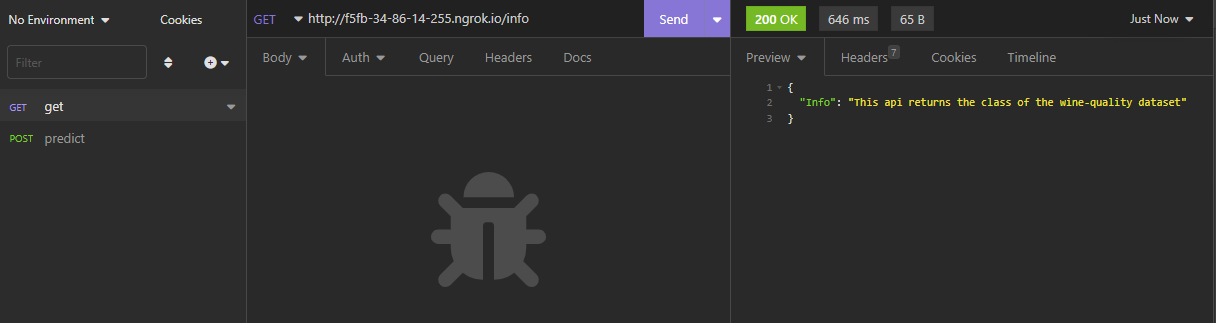

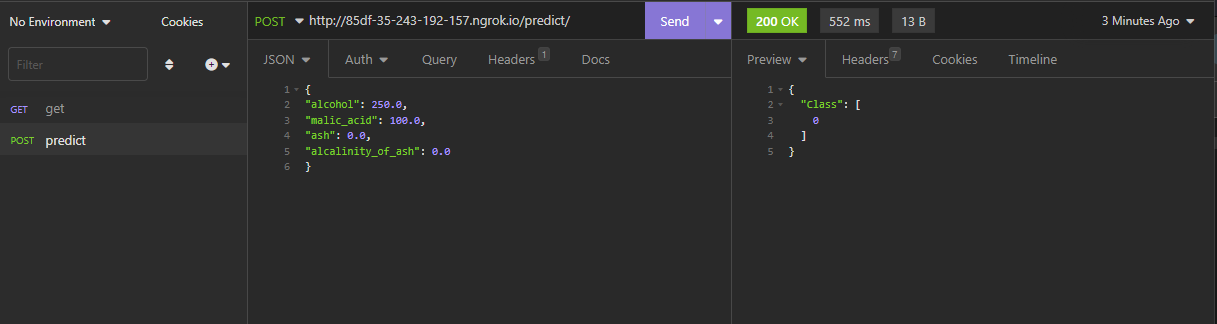